In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


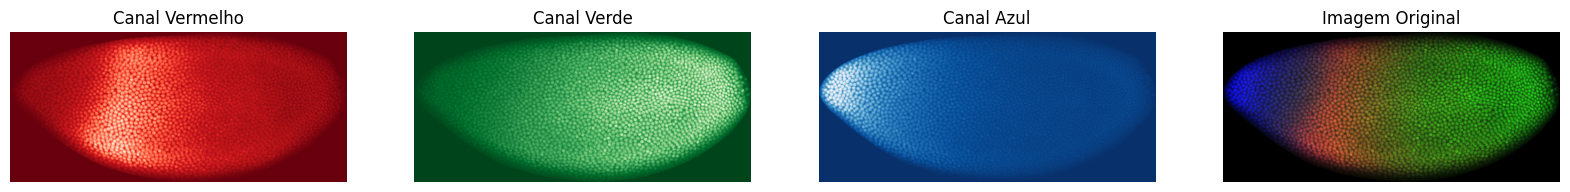

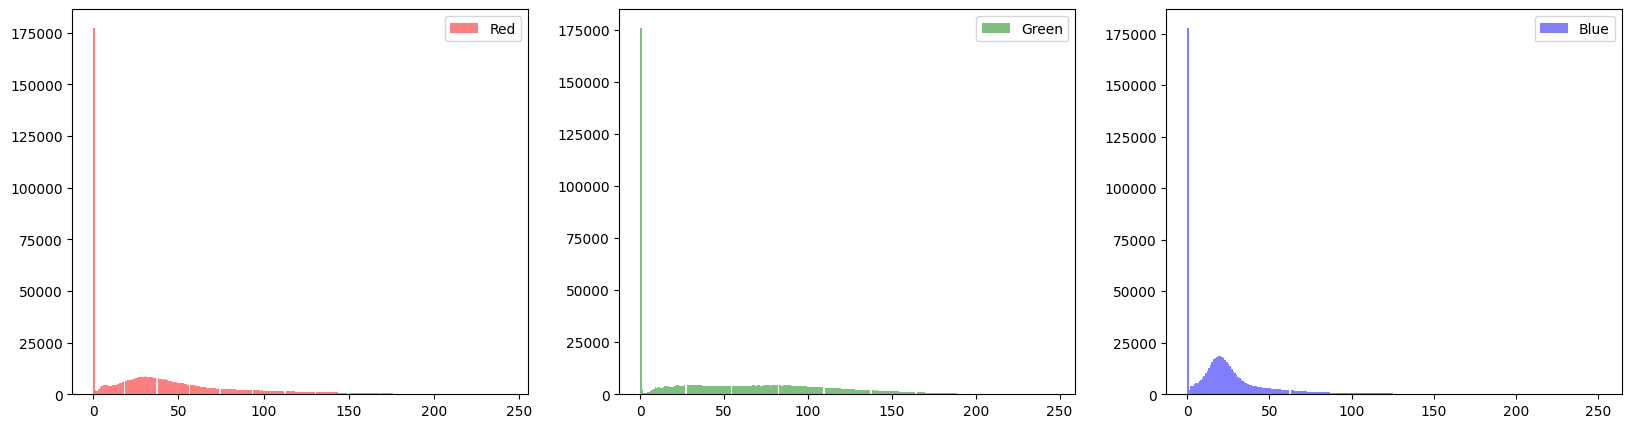

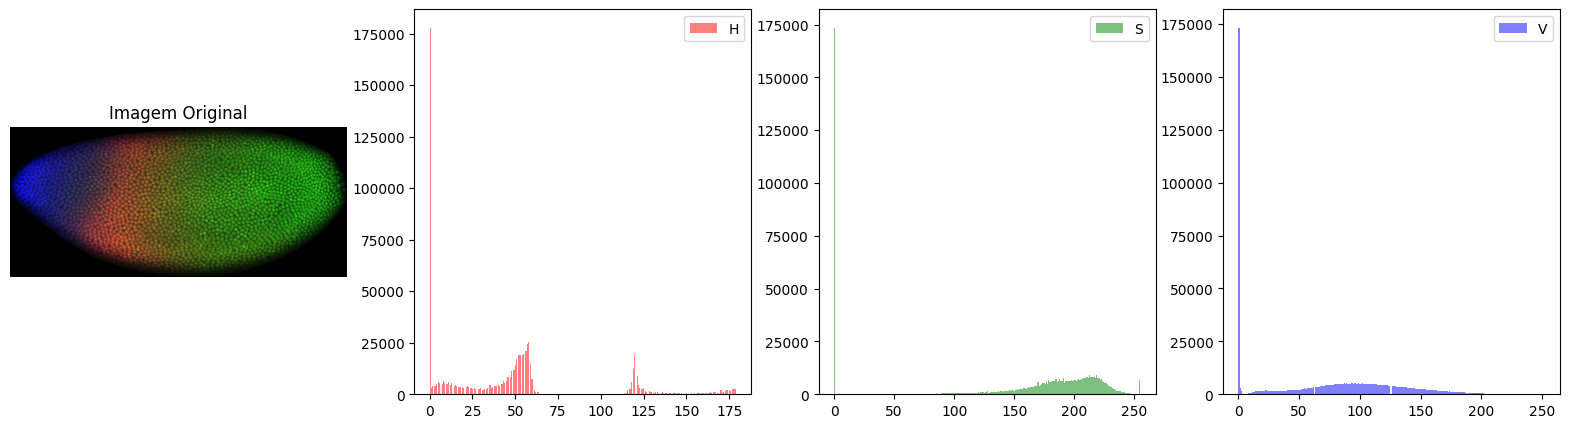

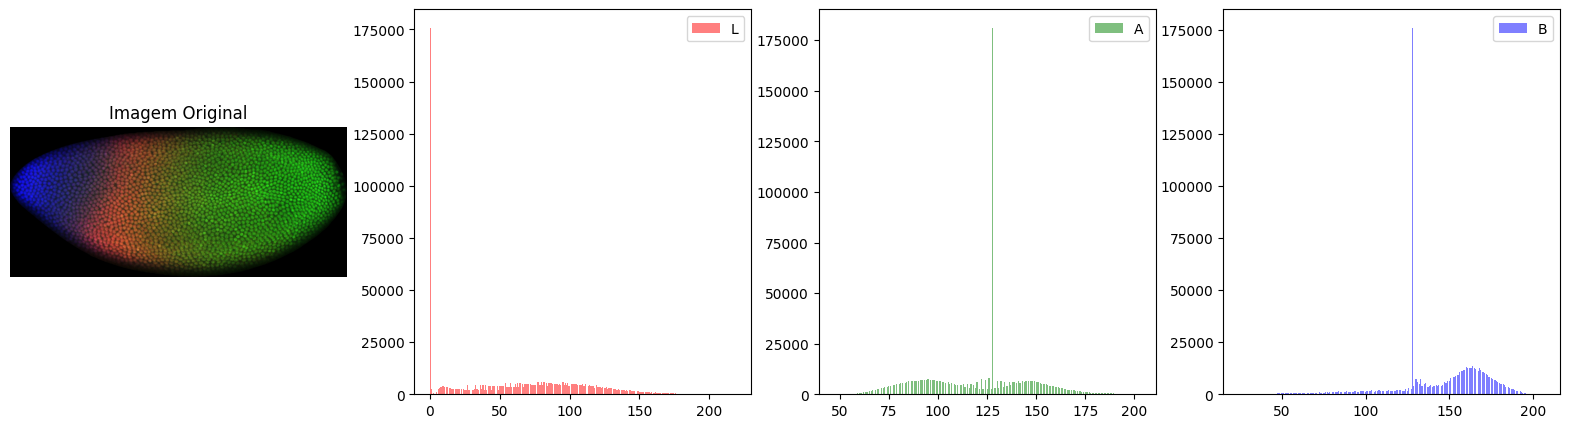

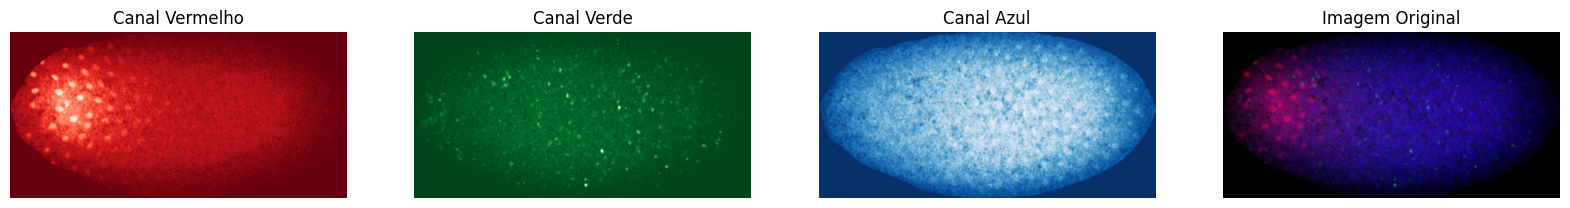

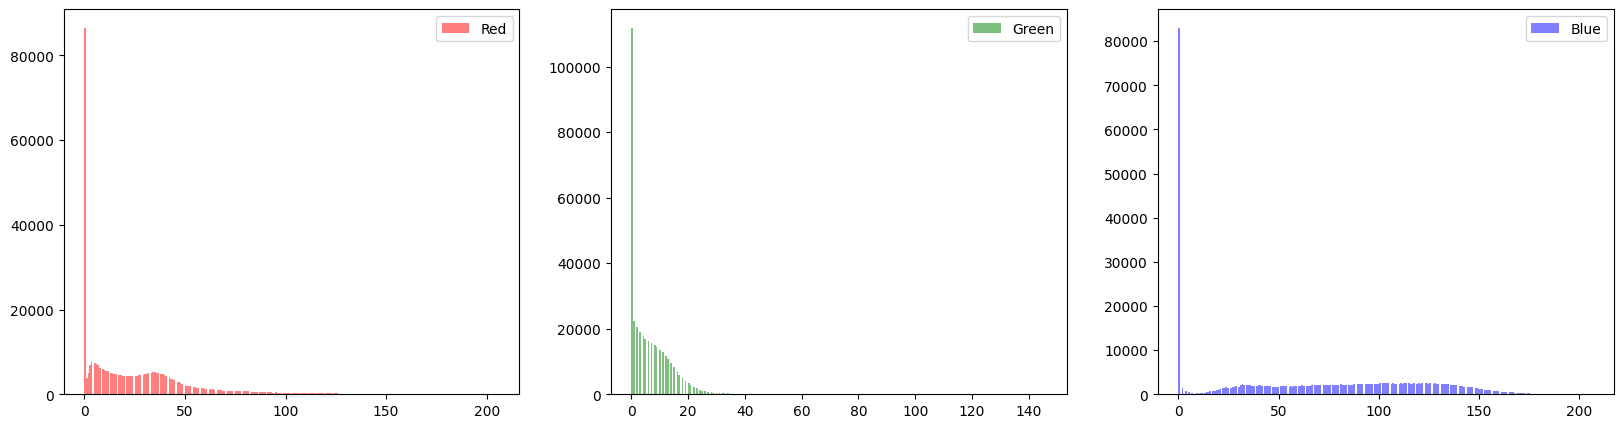

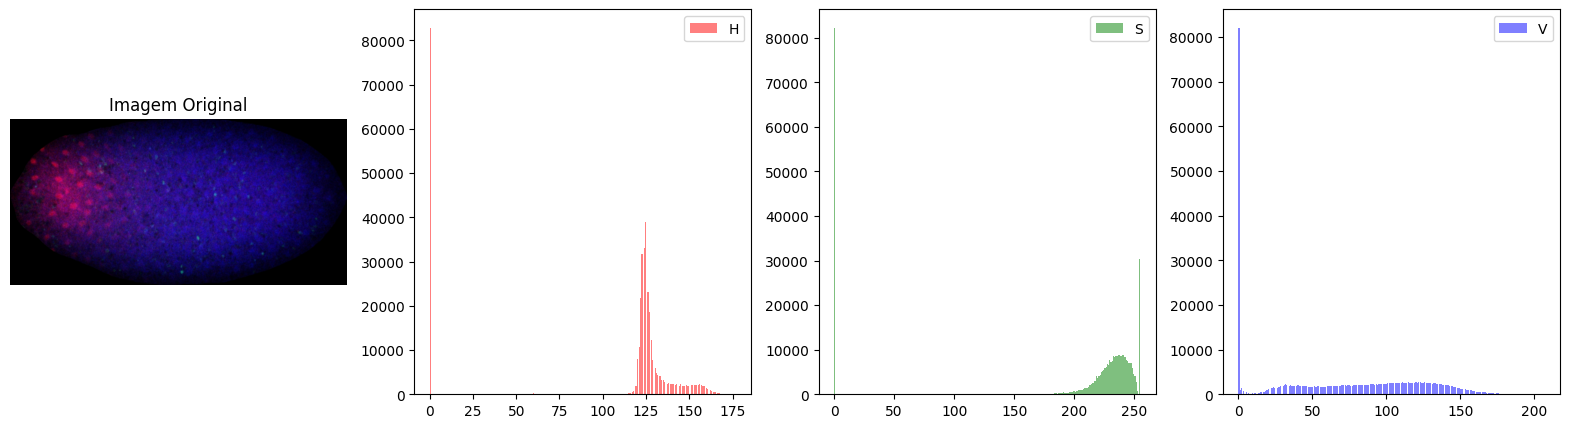

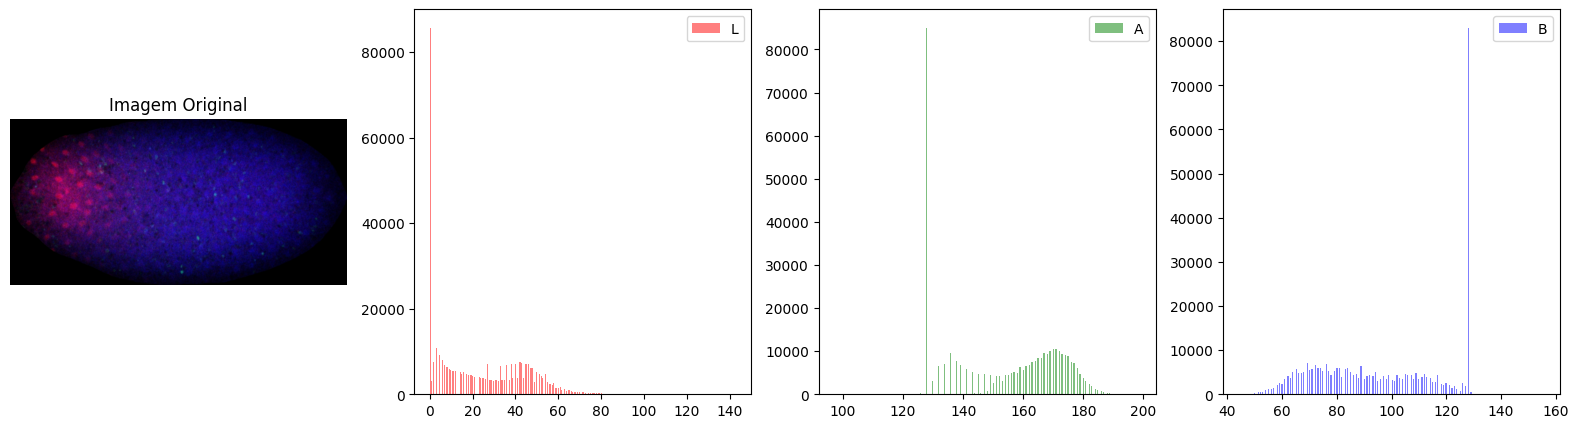

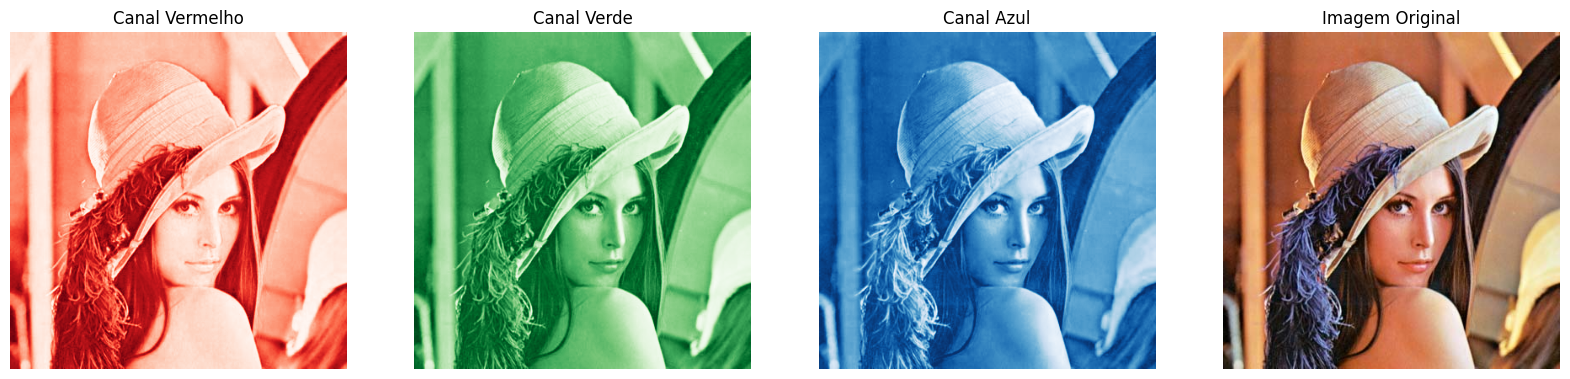

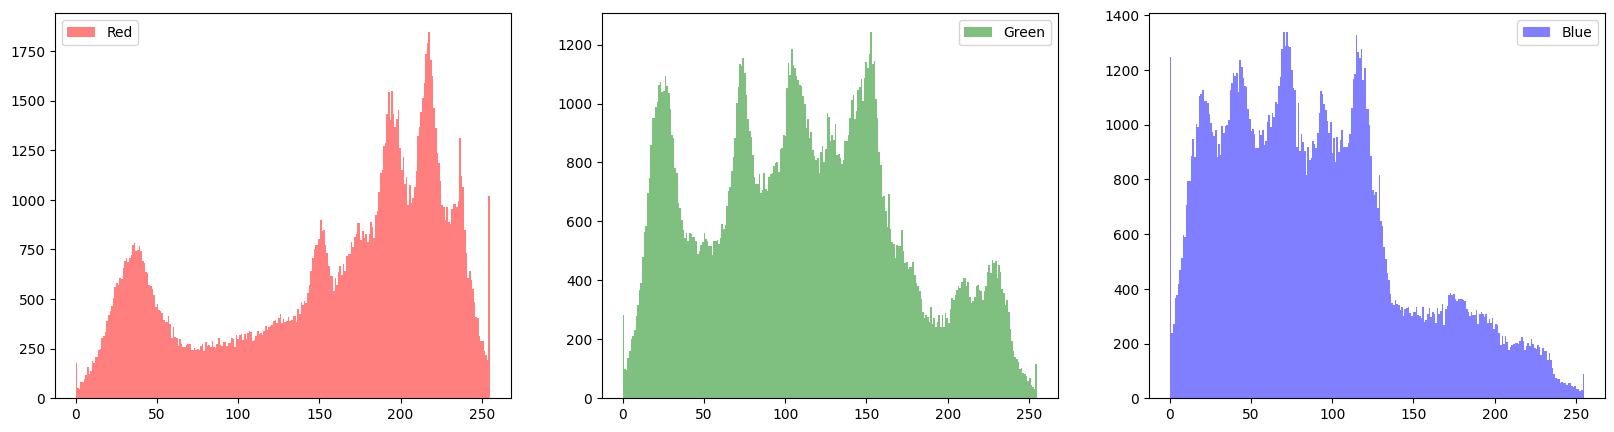

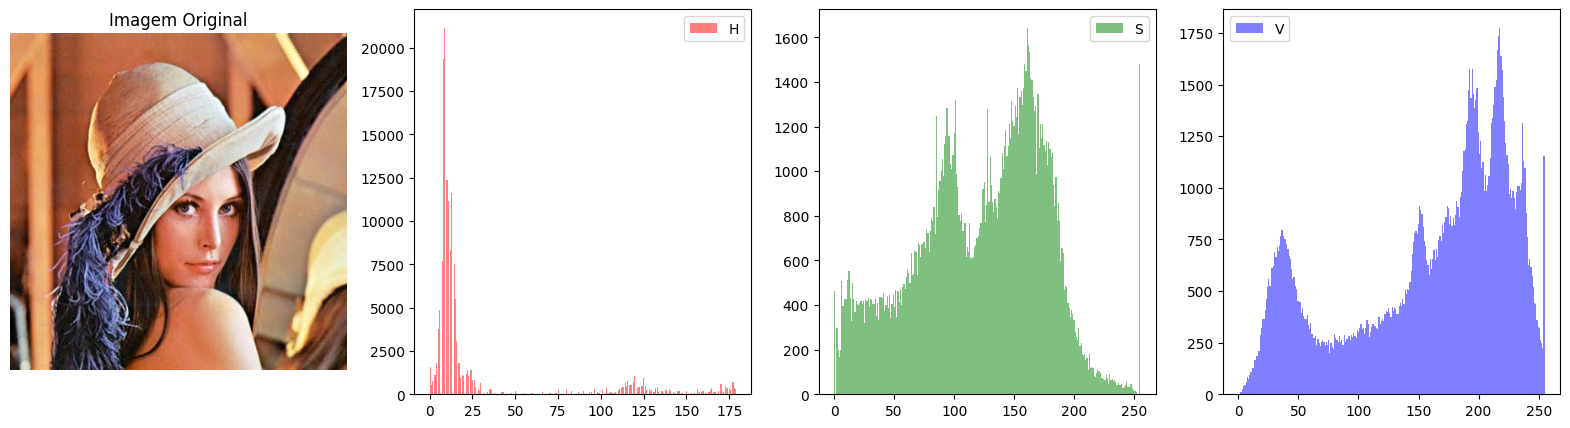

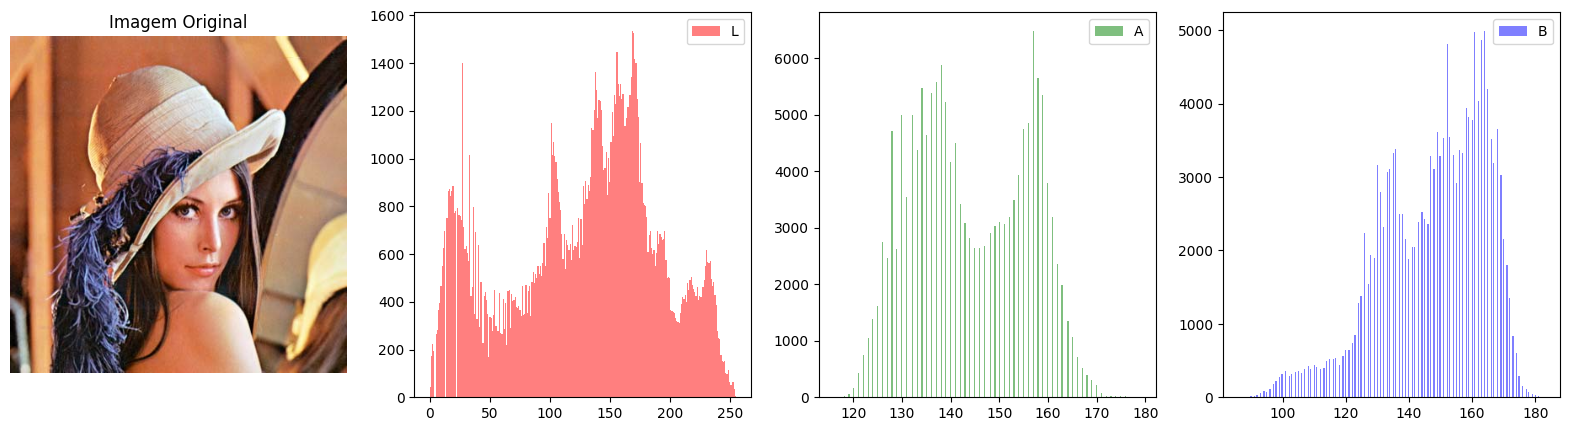

In [36]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

def show_hist(img, color_mode="rgb"):
    match color_mode:
        case "rgb":
            red_channel = img[:, :, 0]
            green_channel = img[:, :, 1]
            blue_channel = img[:, :, 2]
            plt.figure(figsize=(20, 5))
            plt.subplot(1, 4, 1)
            plt.axis("off")
            plt.imshow(red_channel * -1, cmap='Reds')
            plt.title("Canal Vermelho")

            plt.subplot(1, 4, 2)
            plt.axis("off")
            plt.imshow(green_channel * -1, cmap='Greens')
            plt.title("Canal Verde")

            plt.subplot(1, 4, 3)
            plt.axis("off")
            plt.imshow(blue_channel * -1, cmap='Blues')
            plt.title("Canal Azul")

            plt.subplot(1, 4, 4)
            plt.axis("off")
            plt.imshow(img)
            plt.title("Imagem Original")
            plt.show()

            plt.figure(figsize=(20, 5))
            plt.subplot(1, 3, 1)
            plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red')
            plt.legend()
            
            plt.subplot(1, 3, 2)
            plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green')
            plt.legend()

            plt.subplot(1, 3, 3)
            plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
            plt.legend()

            plt.show()
        case "hsv":
            hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            h_channel = hsv[:, :, 0]
            s_channel = hsv[:, :, 1]
            v_channel = hsv[:, :, 2]
            plt.figure(figsize=(20, 5))
            plt.subplot(1, 4, 1)
            plt.axis("off")
            plt.imshow(img)
            plt.title("Imagem Original")

            plt.subplot(1, 4, 2)
            plt.hist(h_channel.ravel(), bins=256, color='red', alpha=0.5, label='H')
            plt.legend()

            plt.subplot(1, 4, 3)
            plt.hist(s_channel.ravel(), bins=256, color='green', alpha=0.5, label='S')
            plt.legend()

            plt.subplot(1, 4, 4)
            plt.hist(v_channel.ravel(), bins=256, color='blue', alpha=0.5, label='V')
            plt.legend()

            plt.show()
        case "lab":
            lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
            l_channel = lab[:, :, 0]
            a_channel = lab[:, :, 1]
            b_channel = lab[:, :, 2]
            plt.figure(figsize=(20, 5))

            plt.subplot(1, 4, 1)
            plt.axis("off")
            plt.imshow(img)
            plt.title("Imagem Original")

            plt.subplot(1, 4, 2)
            plt.hist(l_channel.ravel(), bins=256, color='red', alpha=0.5, label='L')
            plt.legend()

            plt.subplot(1, 4, 3)
            plt.hist(a_channel.ravel(), bins=256, color='green', alpha=0.5, label='A')
            plt.legend()

            plt.subplot(1, 4, 4)
            plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.5, label='B')
            plt.legend()

            plt.show()

show_hist(img1RGB, "rgb")
show_hist(img1RGB, "hsv")
show_hist(img1RGB, "lab")

show_hist(img2RGB, "rgb")
show_hist(img2RGB, "hsv")
show_hist(img2RGB, "lab")

show_hist(img3RGB, "rgb")
show_hist(img3RGB, "hsv")
show_hist(img3RGB, "lab")


2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

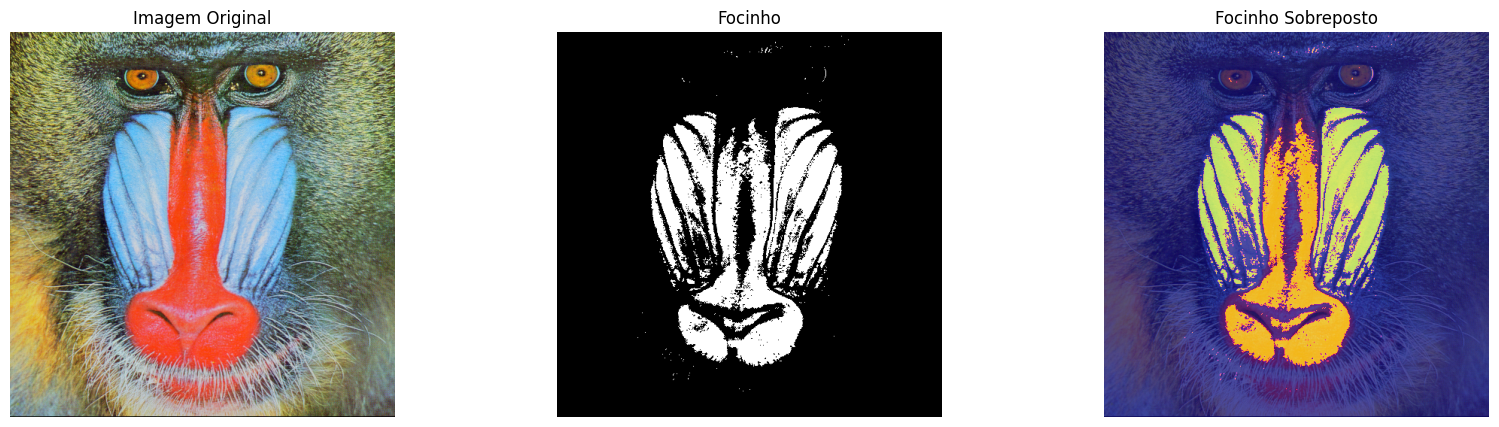

In [89]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)

img_red = img_mand_RGB[:,:,0]
img_blue = img_mand_RGB[:,:,2]

new_img = np.where((img_red > 234) | (img_blue > 220), 255, 0)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_mand_RGB)
plt.axis("off")
plt.title("Imagem Original")

plt.subplot(1, 3, 2)
plt.imshow(new_img, cmap="gray")
plt.axis("off")
plt.title("Focinho")

plt.subplot(1, 3, 3)
plt.imshow(img_mand_RGB)
plt.imshow(new_img, alpha= 0.65, cmap="plasma")
plt.axis("off")
plt.title("Focinho Sobreposto")


plt.show()


3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

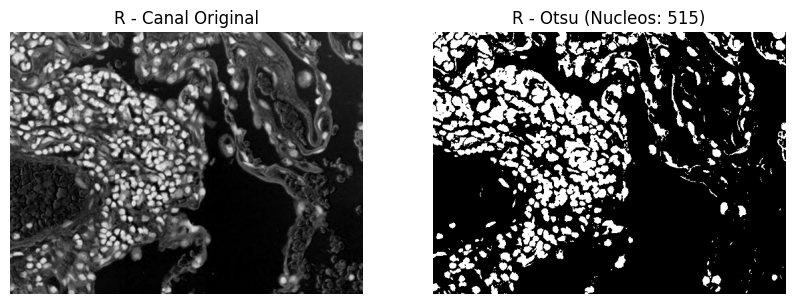

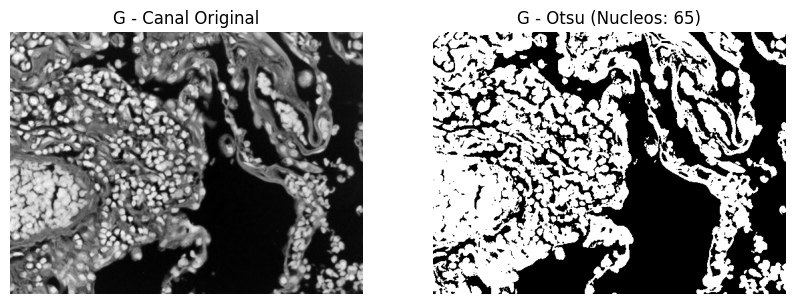

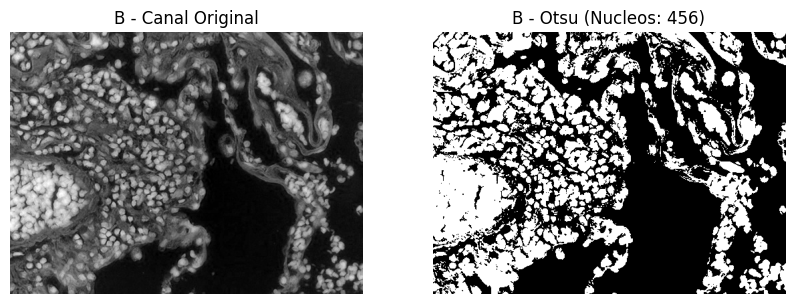

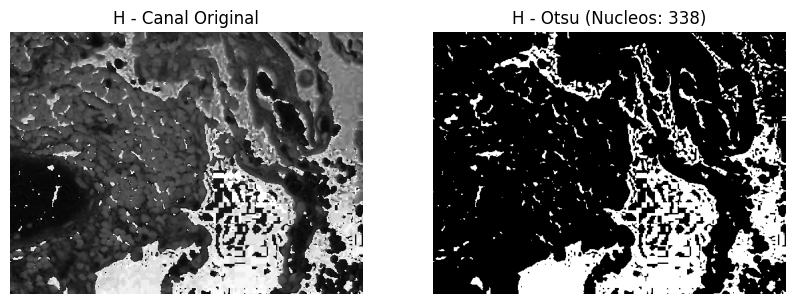

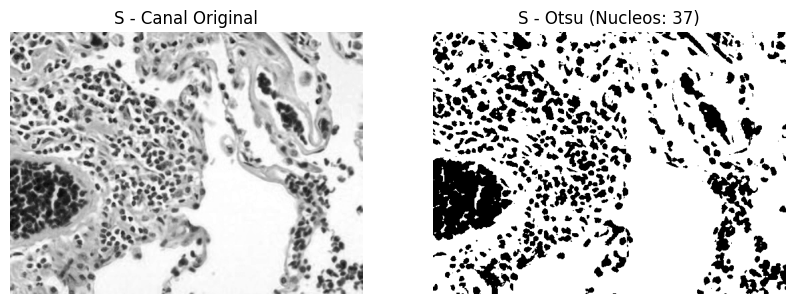

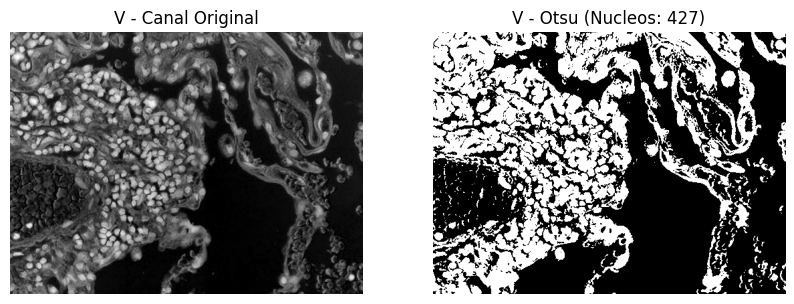

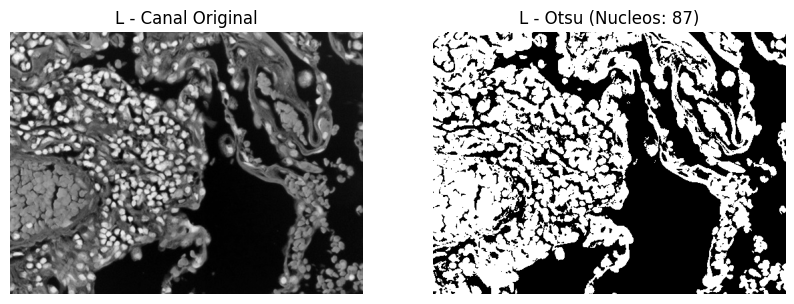

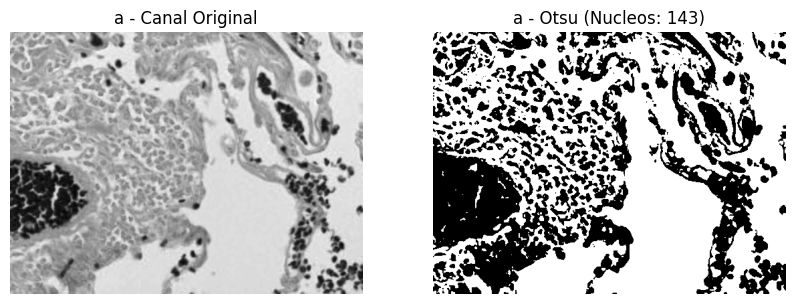

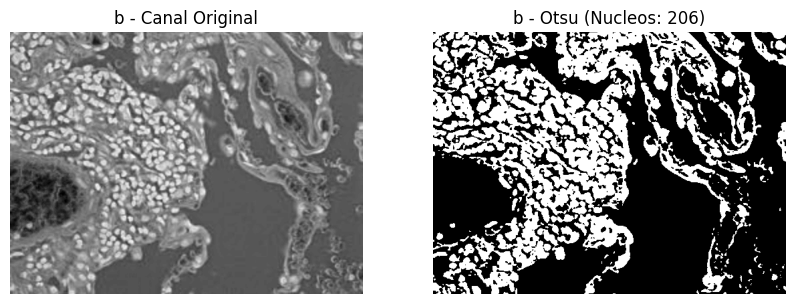

Contagem de nucleos:
R: 515 nucleos
G: 65 nucleos
B: 456 nucleos
H: 338 nucleos
S: 37 nucleos
V: 427 nucleos
L: 87 nucleos
a: 143 nucleos
b: 206 nucleos


In [103]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR) 
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
img_he_HSV = cv2.cvtColor(img_he_RGB, cv2.COLOR_RGB2HSV)
img_he_LAB = cv2.cvtColor(img_he_RGB, cv2.COLOR_RGB2LAB)

def apply_otsu_and_count(img_channel, title):
    img_channel = 255 - img_channel
    _, binary = cv2.threshold(img_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_nuclei = len(contours)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_channel, cmap='gray')
    plt.title(f'{title} - Canal Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(binary, cmap='gray')
    plt.title(f'{title} - Otsu (Nucleos: {num_nuclei})')
    plt.axis('off')
    plt.show()
    return num_nuclei

channels = {
    'R': img_he_RGB[:, :, 0],
    'G': img_he_RGB[:, :, 1],
    'B': img_he_RGB[:, :, 2],
    'H': img_he_HSV[:, :, 0],
    'S': img_he_HSV[:, :, 1],
    'V': img_he_HSV[:, :, 2],
    'L': img_he_LAB[:, :, 0],
    'a': img_he_LAB[:, :, 1],
    'b': img_he_LAB[:, :, 2]
}

results = {}
for channel_name, channel_data in channels.items():
    results[channel_name] = apply_otsu_and_count(channel_data, channel_name)

print("Contagem de nucleos:")
for channel_name, num_nuclei in results.items():
    print(f'{channel_name}: {num_nuclei} nucleos')